<h2> Examen de Simulacion </h2>
Nombre: Esteban David Rosero Perez

# Proyecto Simulacion SIMPY Plan Piloto Regreso a Clases

Objetivos a tomar en cuenta en la simulacion

•	Solo se va a tener en cuanta uno de los planteles educativos(Escuela, colegio, universidad dentro del Azuay).<br>
•	Se tiene un promedio que el 90% de los docentes han sido vacunados y pueden realizar el proceso de ingreso en cada uno de los cursos.<br>
•	Dentro del procesos se tiene que alrededor del 5% - 10% de los estudiantes no podrán asistir debido a no presentar la vacuna/enfermedades.<br>
•	Los estudiantes solo pertenecen a una sola entidad educativa al igual que los docentes.<br>
•	Se va  a tener un periodo de prueba de un mes, posterior a ello se realiza al azar al 10% de estudiantes una prueba PCR para validar que no estén contagiados.<br>
•	De la ultima el 2% de los estudiantes dan positivo por lo que se cierra el curso completo.<br>
•	Los estudiantes asisten cada semana y estos están en un horario de 6 horas ya sea diurno o nocturno.<br>
•	Tienen un receso 30 minutos dentro del establecimiento en donde se concentran todos los estudiantes y es un foco de contagio del 2%.<br>

<h2> Introduccion </h2>
El golpe económico de la crisis sanitaria del corona virus no va a ser cosa de semanas, sino de meses. Dentro de una de las etapas importantes posteriores a las elecciones presidenciales son la re activación de los pequeños comercios y/o centros educativos. Para ello se plantea realizar un modelo de simulación de eventos discretos que permita determinar cual son los principales factores para la re activación económica en el ingreso a las aulas de los estudiantes


<h2>Observacion:</h2>
Para la simulacion se ha dividido los tiempos de la simulacion a:<br>
1 simulacion = 1 hora <br>
tiempo de simulacion = 60 minutos * 24 horas * cantidad de estudiantes <br>

<h2> Importamos las librerias </h2>

In [403]:
import simpy
import random
import numpy
import matplotlib.pyplot as pp

# Simulacion
Para la simulacion nosotros vamos a tomar en cuenta la unidad educativa madrid, en la cual asistiran 255 estudiantes, en ello lo tomaremos en cuenta para el proceso de simulacion, en el cual tendran un uso horario de la institucion de 6 horas repartidas entre las 3 primeras horas, un receso de 30 minutos y las 2:30 horas siguientes. 

<h2> Ingresamos los parametros Iniciales para la Simulacion</h2>

In [404]:
inicio = 10
tiempo_simulacion = 367200 # equivale al tiempo por dia en minutos (1440) por numero de estudiantes
estudiantes=255
docentes=30
cursos=40
dias=0

<h2> Creamos la logica para la simulacion: </h2>
Primero procedemos a crear la asignacion de estudiantes que pertenecen a ciertos cursos por lo cual generamos un metodo en el cual asigne aleatoriamente los estudiantes a los cursos.

In [405]:
estudiantesCursos = {}
def estudiantesCursosList():
    for i in range(estudiantes):
        estudiantesCursos[i+1] = 'estudiante_{}'.format(i+1),random.randint(1,cursos)
    return estudiantesCursos

Despues procedemos a crear la logica que se va a manejar dentro de la simulacion, en la cual consistia en que cada uno de los estudiantes ingresan a la institucion, despues procede a las 3 primera horas, se toman un receso, llegan a las otras horas y se retiran a sus casas. Al final del plan piloto del mes, se procedera a realizar la prueba de pcr al 10% de estudiantes de forma aleatoria, si existen contagiados se cierran los cursos.

In [406]:
class procesoClases():
    def __init__(self,entorno):
        self.env = entorno

    def llegada_curso(self,tiempo):
        yield self.env.timeout(tiempo)

    def entrada_primera_hora(self,tiempo):
        yield self.env.timeout(tiempo)

    def receso(self,tiempo):
        yield self.env.timeout(tiempo)

    def entrada_segunda_hora(self,tiempo):
        yield self.env.timeout(tiempo)

    def ir_a_casa(self,tiempo):
        yield self.env.timeout(tiempo)
        
        
    def prueba_pcr(self,listado):
        estudiantes_pcr = []
        for i in range(int(len(listado.keys()))):
            if((random.randint(1,100))<=14):
                estudiantes_pcr.append(i)
        return estudiantes_pcr


    def clases(self,persona):
        ##print('Persona {} '.format(persona))
        tiempo_llegada = random.uniform(0.016,0.032)
        yield self.env.process(self.llegada_curso(tiempo_llegada))            
        ##se mantienen en los cursos primeras horas
        tiempo_primera_hora = 3 
        yield self.env.process(self.entrada_primera_hora(tiempo_primera_hora))
        ##receso
        tiempo_receso = 0.5
        yield self.env.process(self.receso(tiempo_receso))
        tiempo_segunda_hora = 2.5 
        yield self.env.process(self.entrada_segunda_hora(tiempo_segunda_hora))
        ##se va a la casa
        tiempo_en_casa = 18
        yield self.env.process(self.ir_a_casa(tiempo_en_casa))
            

Procedemos a crear la clase simulacion, aqui nosotros declaramos el entorno que va a simular y en que tiempos queremos que se simule en nuestro caso, tomaremos en cuenta que se va realizar la simulacion por 30 dias y al dia 31 se procedera a realizar la prueba de pcr

In [407]:
cerrarCursos = []
contagiadosNuevo = []
contagiosEstudiantes = []
class Simulacion():
    def ejecutar_simulacion(self,env,listadoEstudiantes):
        proceso = procesoClases(env)
        if dias < 31:
            print('Entran {} estudiantes a clases'.format(len(listadoEstudiantes)))
            for i in listadoEstudiantes.items():
                yield env.process(proceso.clases(i))
        else:
            contagiadosNuevo = proceso.prueba_pcr(listadoEstudiantes)
            contagiosEstudiantes.append(len(contagiadosNuevo))
            for i in range(len(contagiadosNuevo)):
                for j in range(int(len(listadoEstudiantes.keys()))):
                    if(contagiadosNuevo[i]==j):
                        cerrarCursos.append(listadoEstudiantes.get(j)[1])

# Resultados

Procedemos a simular y estos son los resultados:

In [408]:
for i in range(32):
    print('DÍA {} ++++++++++++'.format(i))
    env = simpy.Environment()
    simulacion = Simulacion()
    env.process(simulacion.ejecutar_simulacion(env,estudiantesCursosList()))
    env.run(until=tiempo_simulacion)
    dias+=1

DÍA 0 ++++++++++++
Entran 255 estudiantes a clases
DÍA 1 ++++++++++++
Entran 255 estudiantes a clases
DÍA 2 ++++++++++++
Entran 255 estudiantes a clases
DÍA 3 ++++++++++++
Entran 255 estudiantes a clases
DÍA 4 ++++++++++++
Entran 255 estudiantes a clases
DÍA 5 ++++++++++++
Entran 255 estudiantes a clases
DÍA 6 ++++++++++++
Entran 255 estudiantes a clases
DÍA 7 ++++++++++++
Entran 255 estudiantes a clases
DÍA 8 ++++++++++++
Entran 255 estudiantes a clases
DÍA 9 ++++++++++++
Entran 255 estudiantes a clases
DÍA 10 ++++++++++++
Entran 255 estudiantes a clases
DÍA 11 ++++++++++++
Entran 255 estudiantes a clases
DÍA 12 ++++++++++++
Entran 255 estudiantes a clases
DÍA 13 ++++++++++++
Entran 255 estudiantes a clases
DÍA 14 ++++++++++++
Entran 255 estudiantes a clases
DÍA 15 ++++++++++++
Entran 255 estudiantes a clases
DÍA 16 ++++++++++++
Entran 255 estudiantes a clases
DÍA 17 ++++++++++++
Entran 255 estudiantes a clases
DÍA 18 ++++++++++++
Entran 255 estudiantes a clases
DÍA 19 ++++++++++++
En

In [409]:
print('total de Estudiantes y docentes:')
print(estudiantes+docentes)
print('los estudiantes contagiados son:')
print(contagiosEstudiantes)
print('los cursos contagiados son:')
print(set(cerrarCursos))

total de Estudiantes y docentes:
285
los estudiantes contagiados son:
[25]
los cursos contagiados son:
{4, 5, 7, 9, 10, 11, 12, 16, 17, 18, 19, 22, 23, 25, 26, 28, 33, 34, 35, 36}


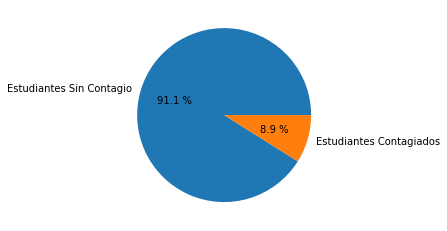

In [410]:
totalEstudiantes=int(len(estudiantesCursos.keys()))
etiquetas = ['Estudiantes Sin Contagio', 'Estudiantes Contagiados']
pp.pie([totalEstudiantes, contagiosEstudiantes[0]], labels=etiquetas, autopct="%0.1f %%")
pp.show()

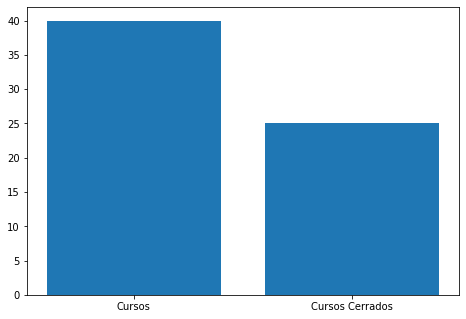

In [411]:
fig = pp.figure()
ax = fig.add_axes([1,1,1,1])
langs = ['Cursos', 'Cursos Cerrados']
curso = [cursos,len(cerrarCursos)]
ax.bar(langs,curso)
pp.show()

<h2>Conclusion </h2>
Como podemos observar la cantidad de curso que se cierran es relativamente alta por que habiamos calculado que el porcentaje de contagio es el 2% en el receso por lo cual, entonces al hacer el calculo por 30 dias que es el plan piloto nos sale que es alrededor de 14% de contagio a nivel global de todos los recesos por lo que podemos observar que alrededor de 30 personas se contagiaron y la cantidad de cursos que se deben cerrar es de 25, por lo que es una cifra muy alta a tomar en cuenta con un rango de contagio muy bajo que es el 2%.

# Referencias
https://educacion.gob.ec/wp-content/uploads/downloads/2012/08/AZUAY11.pdf